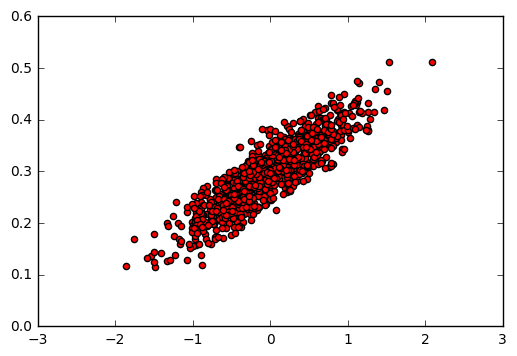

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [6]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
with tf.name_scope('weight'):
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
with tf.name_scope('bias'):
    b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
with tf.name_scope('y'):
    y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# writer = tf.train.SummaryWriter("logs/", sess.graph)
writer = tf.summary.FileWriter("logs/", sess.graph)

W = [0.45255446] b = [0.] loss = 0.1333605
W = [0.3362347] b = [0.30536044] loss = 0.018502109
W = [0.26173285] b = [0.30345154] loss = 0.009149097
W = [0.21077418] b = [0.30222896] loss = 0.0047736885
W = [0.17592025] b = [0.30139273] loss = 0.002726835
W = [0.15208139] b = [0.30082077] loss = 0.0017693022
W = [0.13577645] b = [0.30042958] loss = 0.0013213602
W = [0.12462443] b = [0.300162] loss = 0.0011118094
W = [0.11699685] b = [0.299979] loss = 0.00101378
W = [0.11177985] b = [0.29985383] loss = 0.00096792064
W = [0.1082116] b = [0.2997682] loss = 0.0009464675
W = [0.10577104] b = [0.29970965] loss = 0.00093643134
W = [0.10410178] b = [0.29966962] loss = 0.0009317366
W = [0.10296007] b = [0.2996422] loss = 0.0009295403
W = [0.10217918] b = [0.2996235] loss = 0.00092851295
W = [0.10164507] b = [0.29961067] loss = 0.00092803227
W = [0.10127977] b = [0.2996019] loss = 0.00092780706
W = [0.10102991] b = [0.2995959] loss = 0.00092770194
W = [0.10085902] b = [0.2995918] loss = 0.0009276

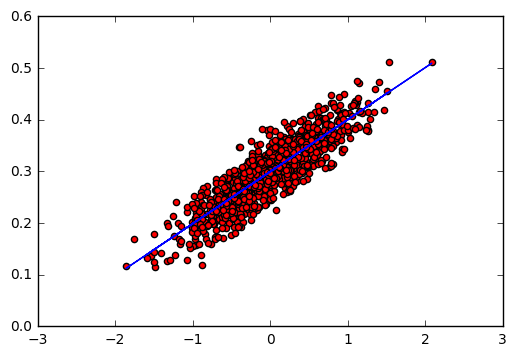

In [7]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()